In [1]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("MAST30034_Yellow_Taxi_Inspection")
    .config("spark.sql.repl.eagerEval.enabled", True)
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/15 20:46:06 WARN Utils: Your hostname, DESKTOP-85B961I resolves to a loopback address: 127.0.1.1; using 172.17.43.247 instead (on interface eth0)
22/08/15 20:46:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/15 20:46:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [49]:
sdf = spark.read.parquet('../data/curated/yellow_taxi_cleaned_subsampled.parquet')

In [50]:
sdf.count()

7696464

In [51]:
# all features retained except for total_amount
retained_features = {"VendorID", "tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","RatecodeID","store_and_fwd_flag","PULocationID","DOLocationID","payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","congestion_surcharge"}

integer_features = {"VendorID", "RatecodeID", "PULocationID", "DOLocationID", "payment_type"}
time_features = {"tpep_pickup_datetime", "tpep_dropoff_datetime"}
boolean_features = {"store_and_fwd_flag"}
non_categorical_features = retained_features - integer_features

print(integer_features)
print(time_features)
print(boolean_features)
print(non_categorical_features)


{'DOLocationID', 'RatecodeID', 'VendorID', 'PULocationID', 'payment_type'}
{'tpep_dropoff_datetime', 'tpep_pickup_datetime'}
{'store_and_fwd_flag'}
{'extra', 'tpep_dropoff_datetime', 'mta_tax', 'passenger_count', 'congestion_surcharge', 'tip_amount', 'trip_distance', 'tolls_amount', 'improvement_surcharge', 'fare_amount', 'store_and_fwd_flag', 'tpep_pickup_datetime'}


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ideas
* Bar chart for passengers, payment type
* histograms -> tip amount, trip distance, fare_amount,

In [42]:
# Histogram for trip distance
df = pd.read_parquet('../data/curated/yellow_taxi_cleaned_subsampled.parquet')

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

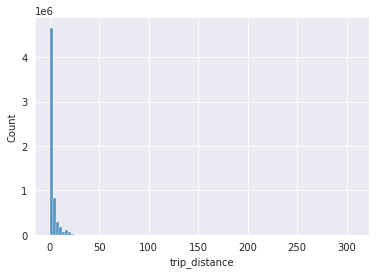

In [43]:
#print(trip_distance)
sns.histplot(x=df['trip_distance'], bins=100)

In [29]:
# log transformations

/usr/local/lib/python3.8/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

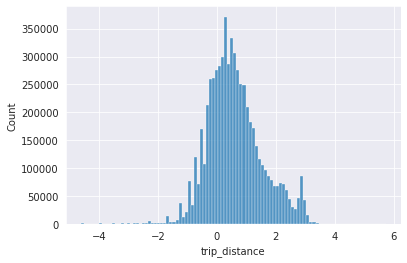

In [27]:
sns.histplot(x=np.log(df['trip_distance']) , bins=100)

interesting spike of activity at log(3) miles

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='tip_amount', ylabel='Count'>

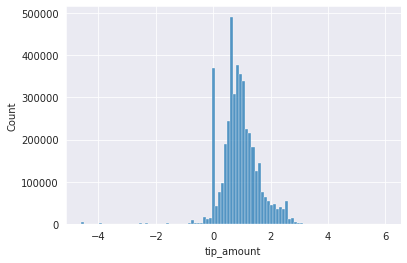

In [44]:
sns.histplot(x=np.log(df['tip_amount']), bins=100)

Tip amount == 0, causing issues
* This is due to cash not having their tips recorded, so not a very useful graph... perhaps could graph tip amount vs payment type?

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

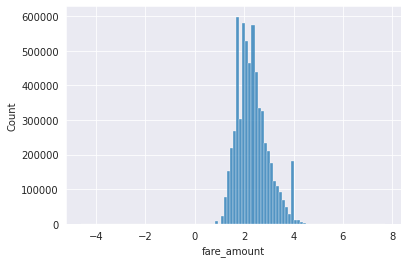

In [45]:
sns.histplot(x=np.log(df['fare_amount']), bins=100)

Fare amount has a spike at log(4) miles, perhaps this is an airport?

<AxesSubplot:xlabel='extra', ylabel='Count'>

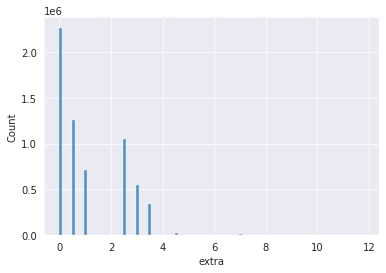

In [34]:
sns.histplot(x=extra['extra'], bins=100)

Consider remove extra -> does not look like very many values

(3927110, 1)

/tmp/ipykernel_41/1377198939.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(df[non_categorical_features].corr())


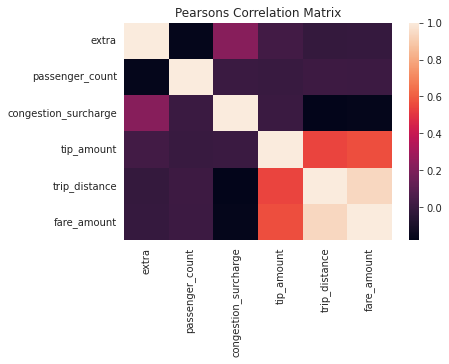

In [47]:
sns.heatmap(df[non_categorical_features].corr())
plt.title('Pearsons Correlation Matrix')
plt.show()

Remove:
* improvement surcharge
* extra
* vendorID

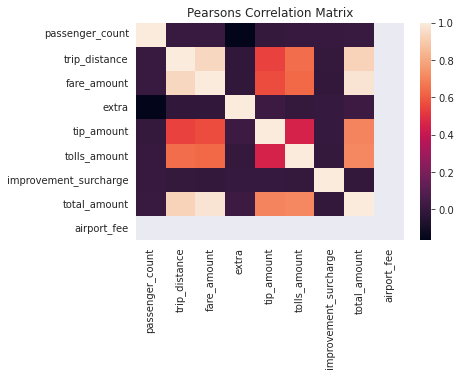

In [48]:
CORR_COLS = [
    "passenger_count", "trip_distance", "fare_amount", "extra", "tip_amount", "tolls_amount", "improvement_surcharge",
    "total_amount", "airport_fee"
]
sns.heatmap(df[CORR_COLS].corr())
plt.title('Pearsons Correlation Matrix')
plt.show()